# Modelagem de IA da FarmTech Solutions – Capítulos 13 e 14


## 1. Preparação inicial

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv('Atividade_Cap_14_produtos_agricolas.csv')

df.rename(columns={
    'N': 'Nitrogênio',
    'P': 'Fósforo',
    'K': 'Potássio',
    'temperature': 'Temperatura',
    'humidity': 'Umidade',
    'ph': 'pH',
    'rainfall': 'Precipitação',
    'label': 'Cultura'
}, inplace=True)

In [35]:
print("Informações gerais:")
print(df.info(), "\n")

print("Valores ausentes por coluna:")
print(df.isnull().sum(), "\n")

print("Valores únicos por coluna:")
print(df.nunique(), "\n")

print("Estatísticas descritivas:")
print(df.describe(), "\n")

print("Distribuição de registros por cultura:")
print(df['Cultura'].value_counts(), "\n")

print("Correlação entre variáveis numéricas:")
print(df.drop(columns='Cultura').corr(), "\n")


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nitrogênio    2200 non-null   int64  
 1   Fósforo       2200 non-null   int64  
 2   Potássio      2200 non-null   int64  
 3   Temperatura   2200 non-null   float64
 4   Umidade       2200 non-null   float64
 5   pH            2200 non-null   float64
 6   Precipitação  2200 non-null   float64
 7   Cultura       2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None 

Valores ausentes por coluna:
Nitrogênio      0
Fósforo         0
Potássio        0
Temperatura     0
Umidade         0
pH              0
Precipitação    0
Cultura         0
dtype: int64 

Valores únicos por coluna:
Nitrogênio       137
Fósforo          117
Potássio          73
Temperatura     2200
Umidade         2200
pH              2200
Precipitação    2200
Cultura    

## GRAFICOS REPRESENTATIVOS

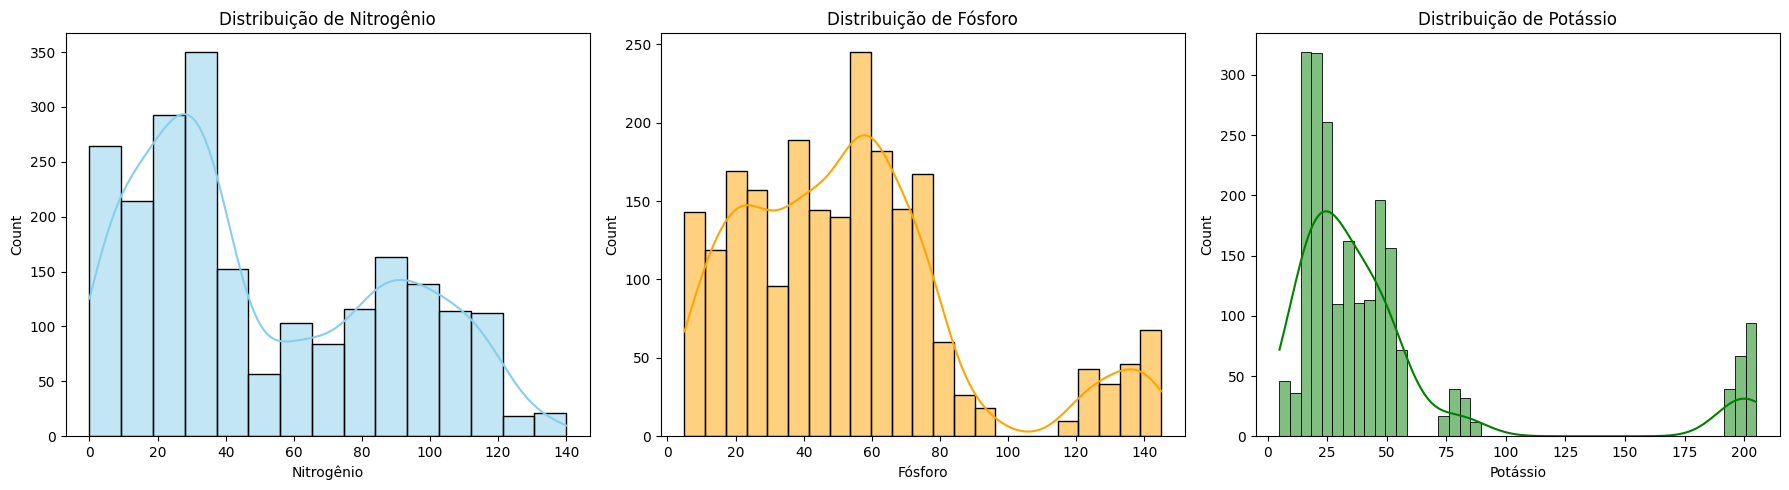

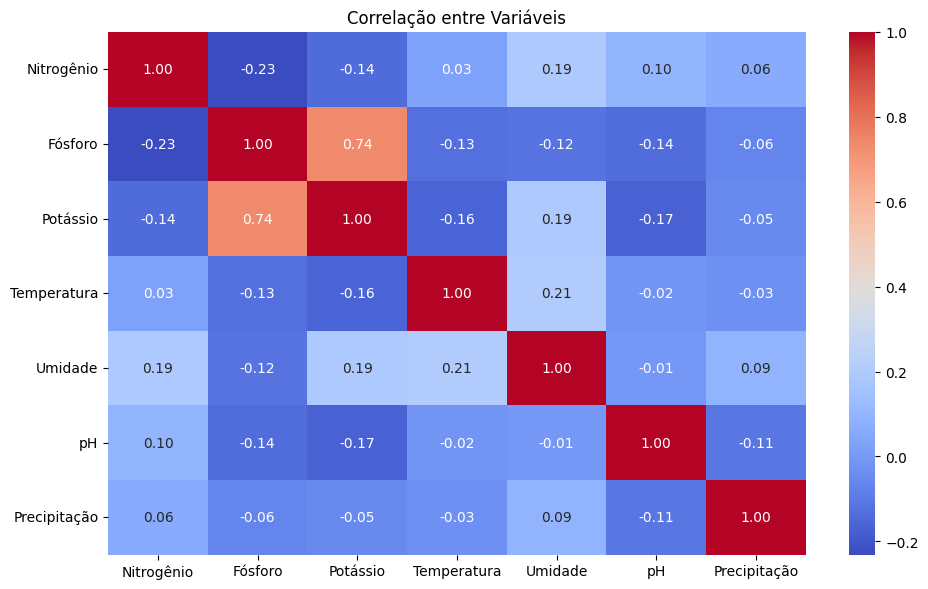

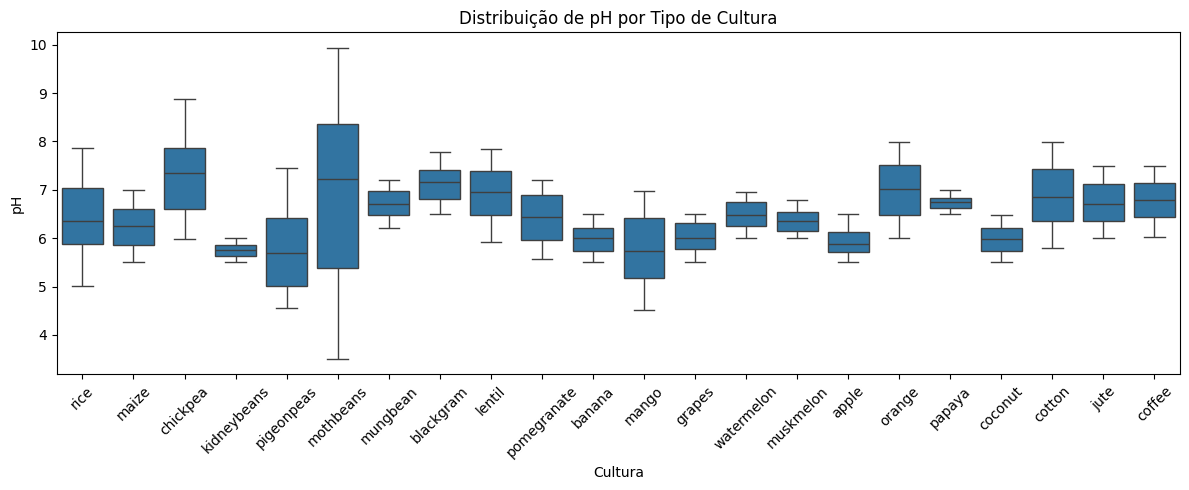

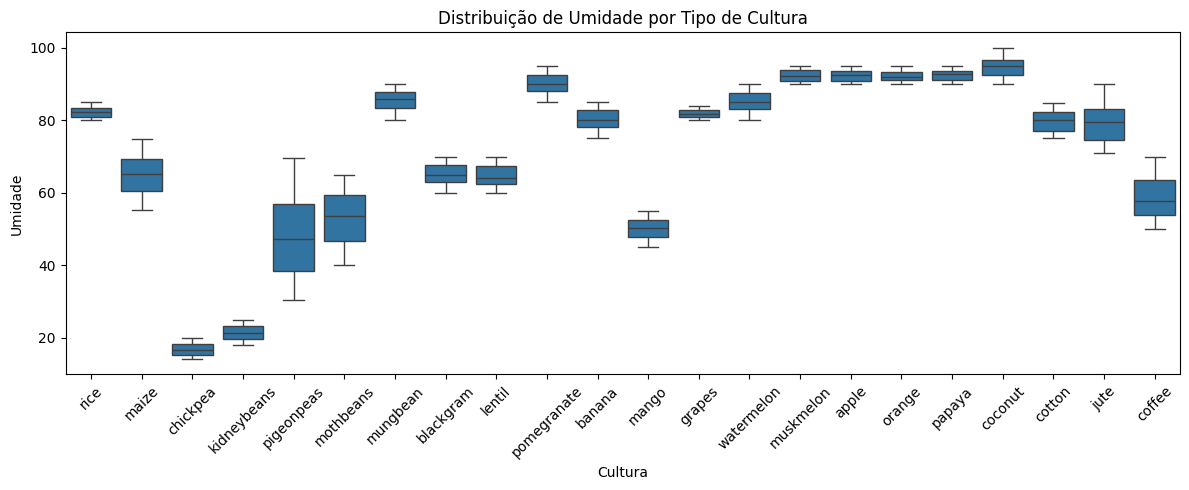

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Nitrogênio'], kde=True, ax=axs[0], color='skyblue').set_title("Distribuição de Nitrogênio")
sns.histplot(df['Fósforo'], kde=True, ax=axs[1], color='orange').set_title("Distribuição de Fósforo")
sns.histplot(df['Potássio'], kde=True, ax=axs[2], color='green').set_title("Distribuição de Potássio")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns='Cultura').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre Variáveis")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Cultura', y='pH')
plt.title("Distribuição de pH por Tipo de Cultura")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot 2: Umidade por tipo de cultura
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Cultura', y='Umidade')
plt.title("Distribuição de Umidade por Tipo de Cultura")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 2. Análise Descritiva
- A distribuição de Nitrogênio mostra a concentração entre 0 e 100, sendo essencial para culturas como arroz e milho.
- Fósforo e Potássio mostram valores mais dispersos, sendo destaque para culturas como manga que precisam de menos Potássio.
- O pH do solo se concentra entre 6 e 7, sendo assim solos mais neutros.
- A umidade é mais elevada sendo importante para culturas como arroz.
- O mapa de calor mostrou que as variáveis são em geral pouco correlacionadas, o que é ótimo para a construção de modelos preditivos.

## Perfil Ideal vs Culturas
- **Arroz**: exige **alta umidade e precipitação**, com nível elevado de Nitrogênio e Potássio.
- **Milho**: tem perfil **equilibrado**, próximo da média em temperatura e umidade, mas com **baixa necessidade de Potássio**.
- **Manga**: cresce em regiões mais **quentes e secas**, com **baixo Fósforo e pH mais ácido**.
→ Concluímos que cada cultura possui adaptações climáticas e nutricionais específicas, porem o milho temum maior destaque

## 3. Modelagem com 5 Algoritmos

In [37]:
X = df.drop(columns='Cultura')
y = df['Cultura']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

modelos = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f'{nome} - Acurácia: {accuracy_score(y_test, y_pred):.4f}')

Decision Tree - Acurácia: 0.9864
Random Forest - Acurácia: 0.9932
Logistic Regression - Acurácia: 0.9523
SVM - Acurácia: 0.9614
KNN - Acurácia: 0.9705


C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ✅ 4. Conclusão Final
- A análise dos dados mostrou que alguns padrões importantes para o cultivo inteligente.
- O modelo **Random Forest** teve a melhor performance (99,32% de acurácia), mostrando-se ideal para essa aplicação.
- Cada cultura analisada possui um 'perfil ideal' específico, o que demonstra a importância da personalização da agricultura.
- Como limitação, não foram consideradas variáveis como pragas, tipos de solo físico ou economia local.